# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame.
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# Review the DataFrame.
applicant_data_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Review the data types associated with the columns.
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame.
applicant_data_df = applicant_data_df.drop(columns=["NAME","EIN"])

# Review the revised DataFrame.
applicant_data_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [5]:
# List data types object for the applicant_data_df.
list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [6]:
# Create a list of categorical variables .
categorical_variables = ["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION", "INCOME_AMT", "SPECIAL_CONSIDERATIONS"]

# Display the categorical variables list.
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [7]:
# Create a OneHotEncoder instance.
enc = OneHotEncoder(sparse=False)

In [8]:
# Encode the categorical variables using OneHotEncoder.
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

In [9]:
# Create a DataFrame with the encoded variables.
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)

# Review the DataFrame.
encoded_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [10]:
# Create a DataFrame with the columnns containing numerical variables from the original dataset.
numerical_variables_df = applicant_data_df.drop(columns = categorical_variables)

# Review the DataFrame.
numerical_variables_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1,5000,1
1,1,108590,1
2,1,5000,0
3,1,6692,1
4,1,142590,1


In [11]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame.
encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# Review the Dataframe.
encoded_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [12]:
# Define the target set y using the IS_SUCCESSFUL column.
y = encoded_df["IS_SUCCESSFUL"]

# Display a sample of y.
y[:5]

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [13]:
# Define features set X by selecting all columns but IS_SUCCESSFUL.
X = encoded_df.drop(columns=["IS_SUCCESSFUL"])

# Review the features DataFrame.
X

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 6: Split the features and target sets into training and testing datasets.


In [14]:
# Split the preprocessed data into a training and testing dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [15]:
# Create a StandardScaler instance.
scaler = StandardScaler()

# Fit the scaler to the features training dataset.
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [16]:
# Define the the number of inputs (features) to the model.
number_input_features = len(X_train.iloc[0])

# Review the number of features.
number_input_features

116

In [17]:
# Define the number of neurons in the output layer.
number_output_neurons = 1

# Review the number of output neurons.
number_output_neurons

1

In [18]:
# Define the number of hidden nodes for the first hidden layer.
hidden_nodes_layer1 = (number_input_features + 1) // 2 

# Review the number hidden nodes in the first layer.
hidden_nodes_layer1

58

In [19]:
# Define the number of hidden nodes for the second hidden layer.
hidden_nodes_layer2 =  (hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer.
hidden_nodes_layer2

29

In [20]:
# Create the Sequential model instance.
nn = Sequential()

In [21]:
# Add the first hidden layer.
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [22]:
# Add the second hidden layer.
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [23]:
# Add the output layer to the model specifying the number of output neurons and activation function.
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [24]:
# Display the Sequential model summary.
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [25]:
# Compile the Sequential model.
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Fit the model using 50 epochs and the training data.
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 774us/step - loss: 0.5751 - accuracy: 0.7223
Epoch 2/50
804/804 [==============================] - 1s 757us/step - loss: 0.5548 - accuracy: 0.7302
Epoch 3/50
804/804 [==============================] - 1s 754us/step - loss: 0.5500 - accuracy: 0.7312
Epoch 4/50
804/804 [==============================] - 1s 746us/step - loss: 0.5484 - accuracy: 0.7324
Epoch 5/50
804/804 [==============================] - 1s 737us/step - loss: 0.5474 - accuracy: 0.7322
Epoch 6/50
804/804 [==============================] - 1s 761us/step - loss: 0.5463 - accuracy: 0.7327
Epoch 7/50
804/804 [==============================] - 1s 751us/step - loss: 0.5442 - accuracy: 0.7334
Epoch 8/50
804/804 [==============================] - 1s 752us/step - loss: 0.5437 - accuracy: 0.7353
Epoch 9/50
804/804 [==============================] - 1s 787us/step - loss: 0.5439 - accuracy: 0.7341
Epoch 10/50
804/804 [==============================] - 1s 757us/step - loss: 0.542

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


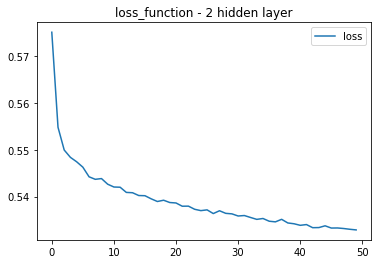

In [27]:
# Vizualise the model loss funtions results.
plt.plot(fit_model.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

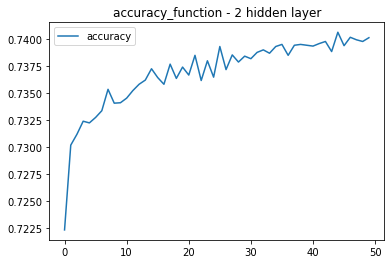

In [28]:
# Vizualise the model accuracy funtions results.
plt.plot(fit_model.history["accuracy"])
plt.title("accuracy_function - 2 hidden layer")
plt.legend(["accuracy"])
plt.show()

In [29]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data.
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results.
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5565 - accuracy: 0.7297 - 242ms/epoch - 903us/step
Loss: 0.5564967393875122, Accuracy: 0.72967928647995


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [30]:
# Set the model's file path.
file_path = Path("./AlphabetSoup.h5")

# Export your model to a HDF5 file.
nn.save(file_path)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [31]:
# Define the the number of inputs (features) to the model.
number_input_features = len(X_train.iloc[0])

# Review the number of features.
number_input_features

116

In [32]:
# Define the number of neurons in the output layer.
number_output_neurons_A1 = 1

# Define the number of neurons in the output layer.
number_output_neurons_A1

1

In [33]:
# Define the number of hidden nodes for the 4 hidden layers.
hidden_nodes_layer1_A1 = 64
hidden_nodes_layer2_A1 = 32
hidden_nodes_layer3_A1 = 16
hidden_nodes_layer4_A1 = 8

# Review the number of hidden nodes in the first layer.
hidden_nodes_layer1_A1

64

In [34]:
# Create the Sequential model instance.
nn_A1 = Sequential()

In [35]:
# First hidden layer.
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation="relu"))

# Second hidden layer.
nn_A1.add(Dense(units=hidden_nodes_layer2_A1, activation="relu"))

# Third hidden layer.
nn_A1.add(Dense(units=hidden_nodes_layer3_A1, activation="relu"))

# Forth hidden layer.
nn_A1.add(Dense(units=hidden_nodes_layer4_A1, activation="relu"))

# Output layer.
nn_A1.add(Dense(units=number_output_neurons_A1, activation="linear"))

# Check the structure of the model.
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                7488      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the Sequential model.
nn_A1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Fit the model using 100 epochs and the training data.
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 806us/step - loss: 0.8002 - accuracy: 0.7054
Epoch 2/100
804/804 [==============================] - 1s 811us/step - loss: 0.6850 - accuracy: 0.7157
Epoch 3/100
804/804 [==============================] - 1s 815us/step - loss: 0.6306 - accuracy: 0.7127
Epoch 4/100
804/804 [==============================] - 1s 842us/step - loss: 0.5950 - accuracy: 0.7248
Epoch 5/100
804/804 [==============================] - 1s 805us/step - loss: 0.5955 - accuracy: 0.7294
Epoch 6/100
804/804 [==============================] - 1s 817us/step - loss: 0.5949 - accuracy: 0.7269
Epoch 7/100
804/804 [==============================] - 1s 823us/step - loss: 0.5965 - accuracy: 0.7262
Epoch 8/100
804/804 [==============================] - 1s 836us/step - loss: 0.6014 - accuracy: 0.7262
Epoch 9/100
804/804 [==============================] - 1s 803us/step - loss: 0.5850 - accuracy: 0.7288
Epoch 10/100
804/804 [==============================] - 1s 835us/step - l

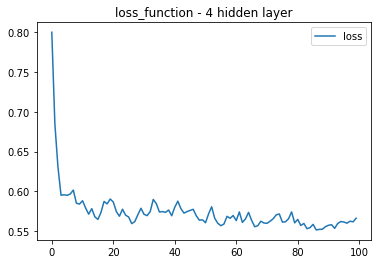

In [38]:
# Vizualise the model loss funtions results.
plt.plot(fit_model_A1.history["loss"])
plt.title("loss_function - 4 hidden layer")
plt.legend(["loss"])
plt.show()

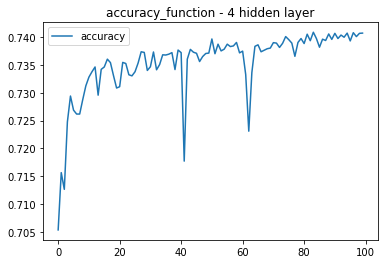

In [39]:
# Vizualise the model accuracy funtions results.
plt.plot(fit_model_A1.history["accuracy"])
plt.title("accuracy_function - 4 hidden layer")
plt.legend(["accuracy"])
plt.show()

In [40]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data.
model_loss_A1, model_accuracy_A1 = nn_A1.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results.
print(f"Loss: {model_loss_A1}, Accuracy: {model_accuracy_A1}")

268/268 - 0s - loss: 0.6132 - accuracy: 0.7291 - 221ms/epoch - 825us/step
Loss: 0.6132019758224487, Accuracy: 0.7290962338447571


#### Alternative Model 2

In [41]:
# Define the the number of inputs (features) to the model.
number_input_features = len(X_train.iloc[0])

# Review the number of features.
number_input_features

116

In [42]:
# Define the number of neurons in the output layer.
number_output_neurons_A2 = 2

In [43]:
# Define the number of hidden nodes for the two hidden layer.
hidden_nodes_layer1_A2 = (number_input_features + 1) // 2

hidden_nodes_layer2_A2 = (hidden_nodes_layer1_A2 + 1) // 2

# Review the number of hidden nodes in the first layer.
hidden_nodes_layer1_A2

58

In [44]:
# Create the Sequential model instance.
nn_A2 = Sequential()

In [45]:
# First hidden layer.
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation="relu"))

# Second hidden layer.
nn_A2.add(Dense(units=hidden_nodes_layer2_A2, activation="relu"))

# Output layer.
nn_A2.add(Dense(units=number_output_neurons_A2, activation="softmax"))

# Check the structure of the model.
nn_A2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 58)                6786      
                                                                 
 dense_9 (Dense)             (None, 29)                1711      
                                                                 
 dense_10 (Dense)            (None, 2)                 60        
                                                                 
Total params: 8,557
Trainable params: 8,557
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compile the model.
nn_A2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Fit the model.
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
804/804 [==============================] - 1s 766us/step - loss: 0.5836 - accuracy: 0.7139
Epoch 2/80
804/804 [==============================] - 1s 745us/step - loss: 0.5548 - accuracy: 0.7296
Epoch 3/80
804/804 [==============================] - 1s 730us/step - loss: 0.5503 - accuracy: 0.7309
Epoch 4/80
804/804 [==============================] - 1s 765us/step - loss: 0.5486 - accuracy: 0.7313
Epoch 5/80
804/804 [==============================] - 1s 731us/step - loss: 0.5466 - accuracy: 0.7331
Epoch 6/80
804/804 [==============================] - 1s 734us/step - loss: 0.5456 - accuracy: 0.7334
Epoch 7/80
804/804 [==============================] - 1s 739us/step - loss: 0.5444 - accuracy: 0.7327
Epoch 8/80
804/804 [==============================] - 1s 771us/step - loss: 0.5434 - accuracy: 0.7343
Epoch 9/80
804/804 [==============================] - 1s 742us/step - loss: 0.5430 - accuracy: 0.7334
Epoch 10/80
804/804 [==============================] - 1s 729us/step - loss: 0.542

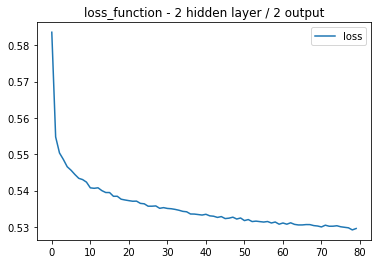

In [48]:
# Vizualise the model loss funtions results.
plt.plot(fit_model_A2.history["loss"])
plt.title("loss_function - 2 hidden layer / 2 output")
plt.legend(["loss"])
plt.show()

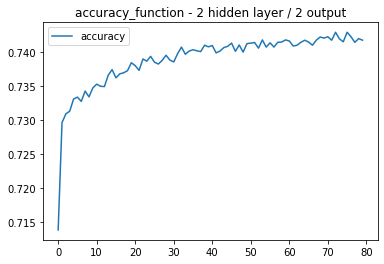

In [49]:
# Vizualise the model accuracy funtions results.
plt.plot(fit_model_A2.history["accuracy"])
plt.title("accuracy_function - 2 hidden layer / 2 output")
plt.legend(["accuracy"])
plt.show()

In [50]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data.
model_loss_A2, model_accuracy_A2 = nn_A2.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results.
print(f"Loss: {model_loss_A2}, Accuracy: {model_accuracy_A2}")

268/268 - 0s - loss: 0.5544 - accuracy: 0.7303 - 205ms/epoch - 765us/step
Loss: 0.5543608665466309, Accuracy: 0.7302623987197876


#### Alternative Model 3

In [51]:
# Define features set X by selecting all columns but IS_SUCCESSFUL and taking out SPECIAL CONSIDERATION_N and Y.
X = encoded_df.drop(columns=["IS_SUCCESSFUL","SPECIAL_CONSIDERATIONS_N","SPECIAL_CONSIDERATIONS_Y"])

# Review the features DataFrame
X

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Split the preprocessed data into a training and testing dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
# Create a StandardScaler instance.
scaler = StandardScaler()

# Fit the scaler to the features training dataset.
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
# Define the the number of inputs (features) to the model.
number_input_features = len(X_train.iloc[0])

# Review the number of features.
number_input_features

114

In [55]:
# Define the number of neurons in the output layer.
number_output_neurons_A3 = 2

In [56]:
# Define the number of hidden nodes for the 3 hidden layers.
hidden_nodes_layer1_A3 = 48
hidden_nodes_layer2_A3 = 24
hidden_nodes_layer3_A3 = 12

# Review the number of hidden nodes in the first layer.
hidden_nodes_layer1_A3

48

In [57]:
# Create the Sequential model instance.
nn_A3 = Sequential()

In [58]:
# First hidden layer.
nn_A3.add(Dense(units=hidden_nodes_layer1_A3, input_dim=number_input_features, activation="relu"))

# Second hidden layer.
nn_A3.add(Dense(units=hidden_nodes_layer2_A3, activation="relu"))

# Third hidden layer.
nn_A3.add(Dense(units=hidden_nodes_layer3_A3, activation="relu"))

# Output layer.
nn_A3.add(Dense(units=number_output_neurons_A3, activation="softmax"))

# Check the structure of the model.
nn_A3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 48)                5520      
                                                                 
 dense_12 (Dense)            (None, 24)                1176      
                                                                 
 dense_13 (Dense)            (None, 12)                300       
                                                                 
 dense_14 (Dense)            (None, 2)                 26        
                                                                 
Total params: 7,022
Trainable params: 7,022
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compile the model.
nn_A3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
# Fit the model.
fit_model_A3 = nn_A3.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 757us/step - loss: 0.5758 - accuracy: 0.7182
Epoch 2/50
804/804 [==============================] - 1s 745us/step - loss: 0.5515 - accuracy: 0.7304
Epoch 3/50
804/804 [==============================] - 1s 752us/step - loss: 0.5490 - accuracy: 0.7310
Epoch 4/50
804/804 [==============================] - 1s 739us/step - loss: 0.5478 - accuracy: 0.7315
Epoch 5/50
804/804 [==============================] - 1s 856us/step - loss: 0.5459 - accuracy: 0.7339
Epoch 6/50
804/804 [==============================] - 1s 743us/step - loss: 0.5449 - accuracy: 0.7337
Epoch 7/50
804/804 [==============================] - 1s 754us/step - loss: 0.5436 - accuracy: 0.7342
Epoch 8/50
804/804 [==============================] - 1s 736us/step - loss: 0.5432 - accuracy: 0.7354
Epoch 9/50
804/804 [==============================] - 1s 769us/step - loss: 0.5422 - accuracy: 0.7347
Epoch 10/50
804/804 [==============================] - 1s 739us/step - loss: 0.541

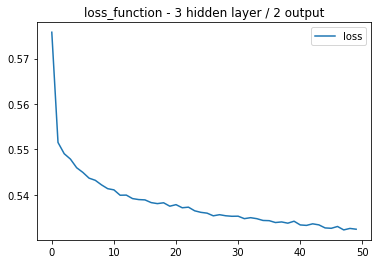

In [61]:
# Vizualise the model loss funtions results.
plt.plot(fit_model_A3.history["loss"])
plt.title("loss_function - 3 hidden layer / 2 output")
plt.legend(["loss"])
plt.show()

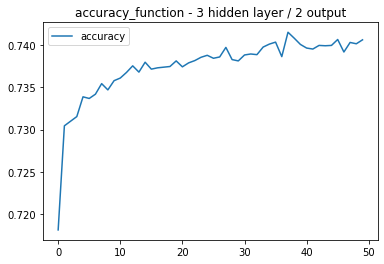

In [62]:
# Vizualise the model accuracy funtions results.
plt.plot(fit_model_A3.history["accuracy"])
plt.title("accuracy_function - 3 hidden layer / 2 output")
plt.legend(["accuracy"])
plt.show()

In [63]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data.
model_loss_A3, model_accuracy_A3 = nn_A3.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results.
print(f"Loss: {model_loss_A3}, Accuracy: {model_accuracy_A3}")

268/268 - 0s - loss: 0.5553 - accuracy: 0.7287 - 210ms/epoch - 784us/step
Loss: 0.5553276538848877, Accuracy: 0.7287463545799255


### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [64]:
print("Original Model | Results")

# Display the model loss and accuracy results.
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

print("---")

print("Alternative - Model 1 | Results")

# Display the model loss and accuracy results.
print(f"Loss: {model_loss_A1}, Accuracy: {model_accuracy_A1}")

print("---")

print("Alternative - Model 2 | Results")

# Display the model loss and accuracy results.
print(f"Loss: {model_loss_A2}, Accuracy: {model_accuracy_A2}")

print("---")

print("Alternative - Model 3 | Results")

# Display the model loss and accuracy results.
print(f"Loss: {model_loss_A3}, Accuracy: {model_accuracy_A3}")

Original Model | Results
Loss: 0.5564967393875122, Accuracy: 0.72967928647995
---
Alternative - Model 1 | Results
Loss: 0.6132019758224487, Accuracy: 0.7290962338447571
---
Alternative - Model 2 | Results
Loss: 0.5543608665466309, Accuracy: 0.7302623987197876
---
Alternative - Model 3 | Results
Loss: 0.5553276538848877, Accuracy: 0.7287463545799255


### Step 3: Save each of your alternative models as an HDF5 file.


In [65]:
# Set the file path for the first alternative model.
file_path =  Path("./AlphabetSoup_A1.h5")

# Export your model to a HDF5 file.
nn_A1.save(file_path)

In [66]:
# Set the file path for the second alternative model.
file_path = Path("./AlphabetSoup_A2.h5")

# Export your model to a HDF5 file.
nn_A2.save(file_path)

In [67]:
# Set the file path for the third alternative model.
file_path = Path("./AlphabetSoup_A3.h5")

# Export your model to a HDF5 file.
nn_A3.save(file_path)